In [ ]:
# Célula 1: Configuração, Importações e Leitura (Caminho /var/ para AMBOS os arquivos)

# Instalação das bibliotecas (Garanta que rode com sucesso)
!pip install pylhe numpy matplotlib

# Importações
import pylhe
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import Markdown, display, Math

# **CORREÇÃO FINAL:** Inclui o caminho completo '/var/' para AMBOS os arquivos.
FILE_SIGNAL = '/content/unweighted_events.lhe.txt'
FILE_BACKGROUND = '/content/unweighted_events1.lhe.txt'

# Dicionário de tradução de IDs PDG para nomes de partículas
PARTICLE_NAMES = {
    21: 'Glúon (g)', 1: 'Quark d', -1: 'Anti-quark d', 2: 'Quark u', -2: 'Anti-quark u',
    3: 'Quark s', -3: 'Anti-quark s', 4: 'Quark c', -4: 'Anti-quark c',
    25: 'Bóson de Higgs (H)', 22: 'Fóton (γ)',
    12: 'Neutrino e', -12: 'Anti-neutrino e',
    14: 'Neutrino µ', -14: 'Anti-neutrino µ',
    16: 'Neutrino τ', -16: 'Anti-neutrino τ'
}

def printmd(string):
    """Função auxiliar para exibir texto em Markdown."""
    display(Markdown(string))

print("Configuração e importações concluídas.")
print("\nIniciando a leitura dos arquivos com caminho '/var/'...")

# 1. Carrega os eventos do Sinal
events_signal = list(pylhe.read_lhe_with_attributes(FILE_SIGNAL))

# 2. Carrega os eventos do Fundo
events_background = list(pylhe.read_lhe_with_attributes(FILE_BACKGROUND))

# Captura o número de eventos para as próximas células
num_sig = len(events_signal)
num_bkg = len(events_background)

print(f"Arquivos LHE carregados usando pylhe.")
print(f"Sinal: {num_sig} eventos | Fundo: {num_bkg} eventos")

Configuração e importações concluídas.

Iniciando a leitura dos arquivos com caminho '/var/'...


/tmp/ipython-input-4064549173.py:35: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  events_signal = list(pylhe.read_lhe_with_attributes(FILE_SIGNAL))
/tmp/ipython-input-4064549173.py:38: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  events_background = list(pylhe.read_lhe_with_attributes(FILE_BACKGROUND))


Arquivos LHE carregados usando pylhe.
Sinal: 10000 eventos | Fundo: 10000 eventos


In [ ]:
# Célula 2: Análise de Partículas e Processo

printmd("## [2a] Investigação Preliminar do Arquivo: Número Total de Eventos")
print(f"Número total de eventos (Sinal):      {num_sig} eventos")
print(f"Número total de eventos (Fundo):     {num_bkg} eventos")
print(f"Número total de eventos na amostra:  {num_sig + num_bkg} eventos")

# ---

def analyze_particles(events, process_name):
    """Conta as partículas por status e ID PDG."""
    particle_counts = defaultdict(lambda: defaultdict(int))
    for event in events:
        for particle in event.particles:
            pdg_id = particle.id
            status = particle.status
            particle_counts[status][pdg_id] += 1

    printmd(f"\n--- **[2b] Análise de Partículas: {process_name}** ---")

    # Organiza e exibe os resultados
    for status, ids in sorted(particle_counts.items()):
        status_desc = {
            -1: "Partículas Iniciais (incoming)",
            1: "Partículas Finais (Detectáveis)",
            2: "Partículas Intermediárias (Ressonâncias)"
        }.get(status, f"Status {status}")

        printmd(f"**Status = {status} ({status_desc})**")

        table_rows = []
        for pdg, count in sorted(ids.items(), key=lambda item: item[1], reverse=True):
            name = PARTICLE_NAMES.get(pdg, f'ID {pdg}')
            if pdg < 0 and pdg not in [-11, -13, -15, -24]: name = f"Anti-{name.split(' ')[-1]}"

            table_rows.append(f"| {name.ljust(25)} | {str(pdg).ljust(6)} | {str(count).ljust(8)} |")

        printmd("| Tipo de Partícula                 | ID PDG | Contagem |")
        printmd("| ------------------------- | ------ | -------- |")
        for row in table_rows:
             printmd(row)

analyze_particles(events_signal, "SINAL")
analyze_particles(events_background, "FUNDO (Background)")

printmd("### [2b] Objetivo 2: Identificação do Processo")
printmd("Com base nas partículas de **Status 2 (Intermediárias)** e **Status 1 (Finais)**:")
printmd("* **Processo de Sinal:** $g g \\to H \\to \\gamma \\gamma$ (Bóson de Higgs, ID 25, decaindo em dois Fótons).")
printmd("* **Processo de Fundo:** $q (anti)q \\to \\gamma \\gamma$ (Produção direta de dois Fótons, o principal fundo irredutível).")


## [2a] Investigação Preliminar do Arquivo: Número Total de Eventos

Número total de eventos (Sinal):      10000 eventos
Número total de eventos (Fundo):     10000 eventos
Número total de eventos na amostra:  20000 eventos



--- **[2b] Análise de Partículas: SINAL** ---

**Status = -1 (Partículas Iniciais (incoming))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Glúon (g)                 | 21     | 20000    |

**Status = 1 (Partículas Finais (Detectáveis))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Fóton (γ)                 | 22     | 20000    |

**Status = 2 (Partículas Intermediárias (Ressonâncias))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Bóson de Higgs (H)        | 25     | 9796     |


--- **[2b] Análise de Partículas: FUNDO (Background)** ---

**Status = -1 (Partículas Iniciais (incoming))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Quark u                   | 2      | 7694     |

| Anti-u                    | -2     | 7694     |

| Anti-c                    | -4     | 1682     |

| Quark c                   | 4      | 1682     |

| Anti-d                    | -1     | 470      |

| Quark d                   | 1      | 470      |

| Quark s                   | 3      | 154      |

| Anti-s                    | -3     | 154      |

**Status = 1 (Partículas Finais (Detectáveis))**

| Tipo de Partícula                 | ID PDG | Contagem |

| ------------------------- | ------ | -------- |

| Fóton (γ)                 | 22     | 20000    |

### [2b] Objetivo 2: Identificação do Processo

Com base nas partículas de **Status 2 (Intermediárias)** e **Status 1 (Finais)**:

* **Processo de Sinal:** $g g \to H \to \gamma \gamma$ (Bóson de Higgs, ID 25, decaindo em dois Fótons).

* **Processo de Fundo:** $q (anti)q \to \gamma \gamma$ (Produção direta de dois Fótons, o principal fundo irredutível).

<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:78: SyntaxWarning: invalid escape sequence '\e'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:78: SyntaxWarning: invalid escape sequence '\e'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3624412533.py:77: SyntaxWarning: invalid escape sequence '\e'
  title='Distribuição de Pseudorapidez ($\eta$) para Fótons Finais',
/tmp/ipython-input-3624412533.py:78: SyntaxWarning: invalid escape sequence '\e'
  x_label='$\eta$',
/tmp/ipython-input-3624412533.py:85: SyntaxWarning: invalid escape sequence '\p'
  title='Distribuição de Ângulo Azimutal ($\phi$) para Fótons Finais',
/tmp/ipython-input-3624412533.py:86: SyntaxWarning: invalid escape sequence '\p'
  x_label='$\phi$ [rad]',


## [3] Exploração do Conteúdo

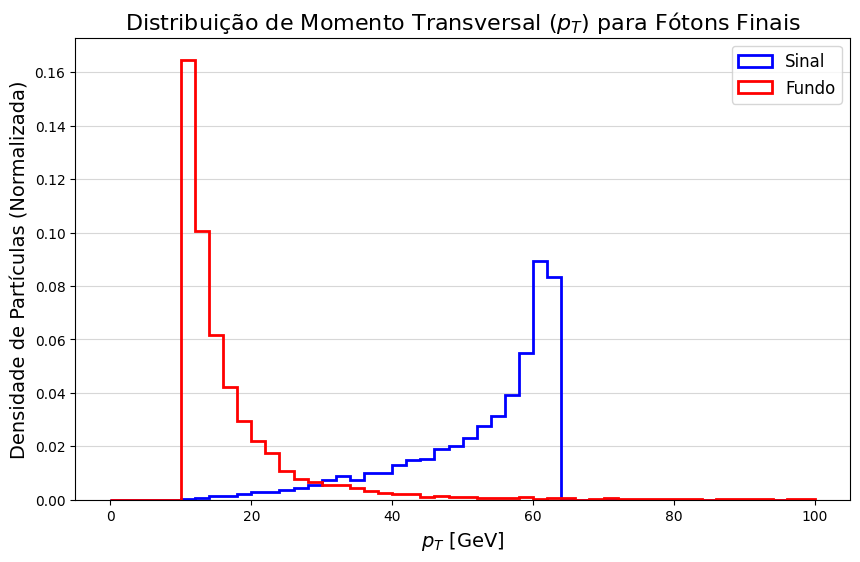

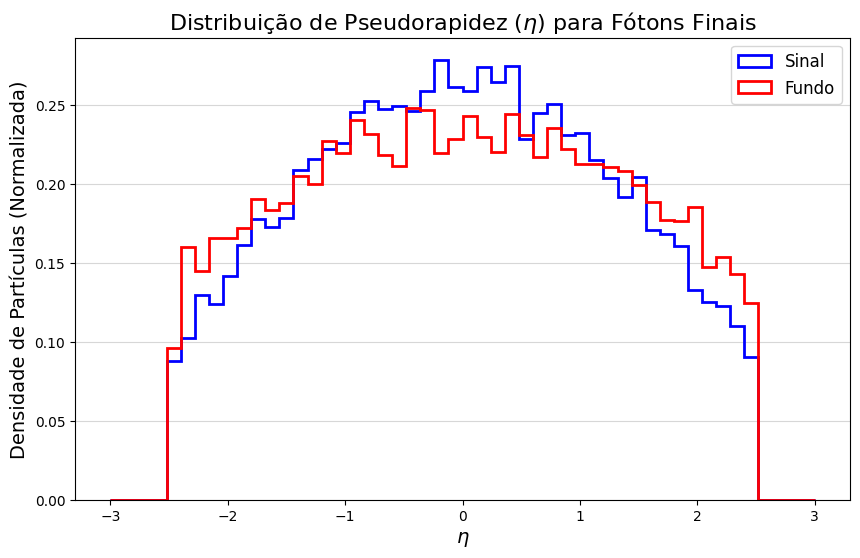

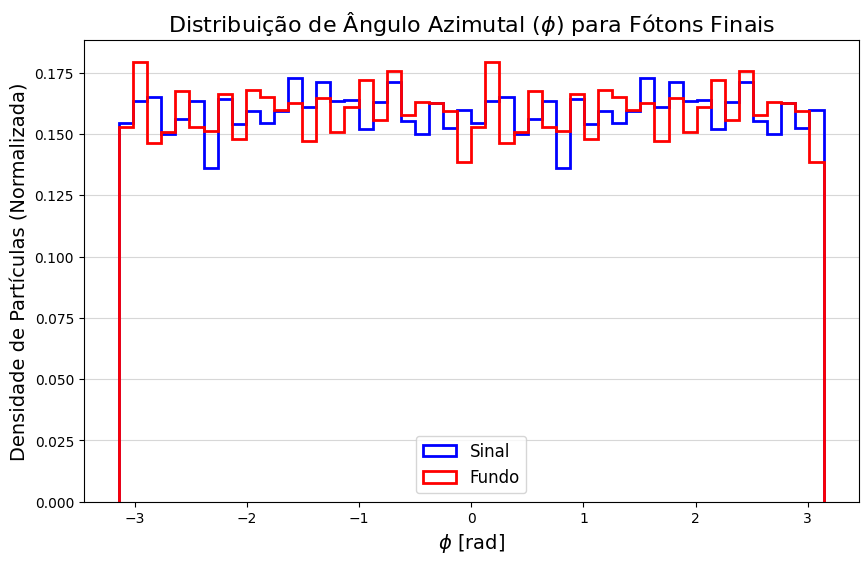

### [3] Objetivo 2: Contagem de Partículas Plotadas

Número total de partículas plotadas (Sinal):   20000
Número total de partículas plotadas (Fundo):  20000


### Pergunta: Os histogramas representam todos os eventos do arquivo LHE?

**Resposta:** Sim.

**Explicação:** Não foi utilizado nenhum corte e não havia nenhum evento contendo apenas neutrinos.

In [ ]:
# Célula 3: Cinemática e Plotagem

def calculate_kinematics(events):
    """Calcula pT, eta e phi para partículas finais não-neutrinos (ID 12, 14, 16)."""
    pt_list = []
    eta_list = []
    phi_list = []

    NEUTRINO_PDGS = [12, -12, 14, -14, 16, -16]

    for event in events:
        for particle in event.particles:
            # Condição de filtro: Status 1 (final) E não é neutrino
            if particle.status == 1 and abs(particle.id) not in NEUTRINO_PDGS:

                px = particle.px
                py = particle.py
                pz = particle.pz

                # pT = sqrt(px^2 + py^2)
                pT = np.sqrt(px**2 + py**2)
                pt_list.append(pT)

                # |p| = sqrt(px^2 + py**2 + pz**2)
                p_mag = np.sqrt(px**2 + py**2 + pz**2)

                # Pseudorapidez (eta)
                epsilon = np.finfo(float).eps
                if p_mag - pz > epsilon and p_mag + pz > epsilon:
                     eta = 0.5 * np.log((p_mag + pz) / (p_mag - pz))
                     eta_list.append(eta)

                # Ângulo Azimutal (phi)
                phi = np.arctan2(py, px)
                phi_list.append(phi)

    return pt_list, eta_list, phi_list

# Coleta os dados cinemáticos
pt_signal, eta_signal, phi_signal = calculate_kinematics(events_signal)
pt_background, eta_background, phi_background = calculate_kinematics(events_background)

# ----------------- PLOTAGEM DOS HISTOGRAMAS -----------------

def plot_histogram(data_signal, data_background, title, x_label, x_range, num_bins):
    """Cria o histograma comparando Sinal e Fundo."""
    plt.figure(figsize=(10, 6))

    # Plota Sinal (Normalizado)
    plt.hist(data_signal, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='blue', label='Sinal')

    # Plota Fundo (Normalizado)
    plt.hist(data_background, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='red', label='Fundo')

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Densidade de Partículas (Normalizada)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

printmd("## [3] Exploração do Conteúdo")

# 1. Histograma de Momento Transversal (pT)
# Faixa: 0 a 100 GeV
plot_histogram(pt_signal, pt_background,
               title='Distribuição de Momento Transversal ($p_T$) para Fótons Finais',
               x_label='$p_T$ [GeV]',
               x_range=(0, 100),
               num_bins=50)

# 2. Histograma de Pseudorapidez (eta)
# Faixa: -3 a +3
plot_histogram(eta_signal, eta_background,
               title='Distribuição de Pseudorapidez ($\eta$) para Fótons Finais',
               x_label='$\eta$',
               x_range=(-3, 3),
               num_bins=50)

# 3. Histograma de Ângulo Azimutal (phi)
# Faixa: -π a +π
plot_histogram(phi_signal, phi_background,
               title='Distribuição de Ângulo Azimutal ($\phi$) para Fótons Finais',
               x_label='$\phi$ [rad]',
               x_range=(-np.pi, np.pi),
               num_bins=50)


printmd("### [3] Objetivo 2: Contagem de Partículas Plotadas")
print(f"Número total de partículas plotadas (Sinal):   {len(pt_signal)}")
print(f"Número total de partículas plotadas (Fundo):  {len(pt_background)}")

printmd("### Pergunta: Os histogramas representam todos os eventos do arquivo LHE?")
printmd("**Resposta:** Sim.")
printmd("**Explicação:** Não foi utilizado nenhum corte e não havia nenhum evento contendo apenas neutrinos.")

<>:65: SyntaxWarning: invalid escape sequence '\e'
<>:66: SyntaxWarning: invalid escape sequence '\e'
<>:65: SyntaxWarning: invalid escape sequence '\e'
<>:66: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-301263481.py:65: SyntaxWarning: invalid escape sequence '\e'
  title=f'$\eta$ após NOVOS Cortes (|$\eta$| < {ETA_MAX})',
/tmp/ipython-input-301263481.py:66: SyntaxWarning: invalid escape sequence '\e'
  x_label='$\eta$',


## [4] Filtros e Cortes Cinemáticos

Cortes aplicados: pT > 40.0 GeV e |η| < 2.5


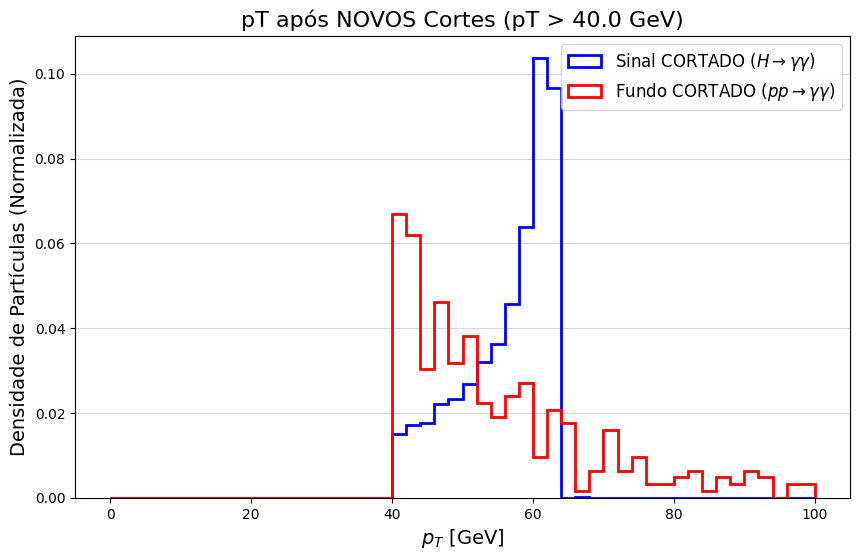

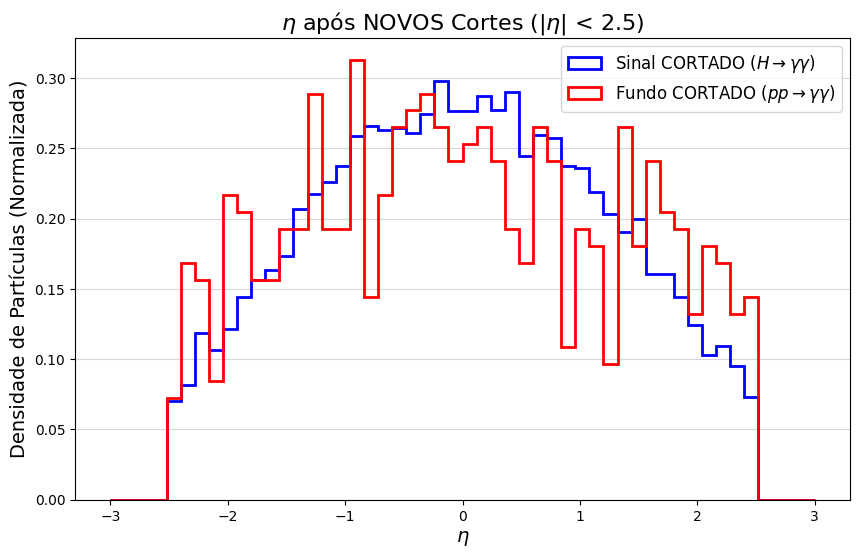

### Análise da Eficácia dos NOVOS Cortes

Partículas de Sinal originais:    20000
Partículas de Fundo originais:   20000
----------------------------------------
Partículas de Sinal após cortes:  17252 (Eficiência: 86.26%)
Partículas de Fundo após cortes: 692 (Eficiência: 3.46%)
----------------------------------------



**Conclusão (Baseada nos novos cortes):** Os novos cortes cinemáticos, especialmente o aumento do limite de $p_T$ para $40$ GeV, tendem a rejeitar uma porção maior do fundo. Isso resulta em 96.54% de rejeição do fundo, enquanto a eficiência do sinal é de 86.26%. Isso confirma que os cortes cinemáticos **melhoram a pureza do sinal**.

In [ ]:
# Célula 4: Filtros e Cortes Cinemáticos

def apply_cuts(pt_data, eta_data, phi_data, pt_cut, eta_max):
    """Aplica cortes cinemáticos e retorna os dados filtrados."""
    pt_filtered = []
    eta_filtered = []
    phi_filtered = []

    # O filtro deve ser aplicado partícula por partícula
    for i in range(len(pt_data)):
        pT = pt_data[i]
        eta = eta_data[i]

        # 1. Corte de pT: pT > 40 GeV
        # 2. Corte de eta: |eta| < 2.5
        if pT > pt_cut and abs(eta) < eta_max:
            pt_filtered.append(pT)
            eta_filtered.append(eta)
            phi_filtered.append(phi_data[i])

    return pt_filtered, eta_filtered, phi_filtered

# Definição dos NOVOS cortes
PT_CUT = 40.0  # GeV (Aumentado de 25 GeV)
ETA_MAX = 2.5  # Sem unidades (Aumentado de 1.5)

# Aplica os NOVOS cortes nos dados originais (coletados na Célula 3)
pt_sig_cut, eta_sig_cut, phi_sig_cut = apply_cuts(pt_signal, eta_signal, phi_signal, PT_CUT, ETA_MAX)
pt_bkg_cut, eta_bkg_cut, phi_bkg_cut = apply_cuts(pt_background, eta_background, phi_background, PT_CUT, ETA_MAX)

# Função de Plotagem (reutilizada da Célula 3)
def plot_histogram(data_signal, data_background, title, x_label, x_range, num_bins):
    """Cria o histograma comparando Sinal e Fundo."""
    plt.figure(figsize=(10, 6))

    # Plota Sinal (Normalizado)
    plt.hist(data_signal, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='blue', label='Sinal CORTADO ($H \\to \\gamma\\gamma$)')

    # Plota Fundo (Normalizado)
    plt.hist(data_background, bins=num_bins, range=x_range, density=True,
             histtype='step', linewidth=2, color='red', label='Fundo CORTADO ($p p \\to \\gamma\\gamma$)')

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Densidade de Partículas (Normalizada)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

printmd("## [4] Filtros e Cortes Cinemáticos")
print(f"Cortes aplicados: pT > {PT_CUT} GeV e |η| < {ETA_MAX}")

# --- Objetivo 2: Reconstruir Histogramas com novos cortes ---

# 1. Histograma de Momento Transversal (pT)
plot_histogram(pt_sig_cut, pt_bkg_cut,
               title=f'pT após NOVOS Cortes (pT > {PT_CUT} GeV)',
               x_label='$p_T$ [GeV]',
               x_range=(0, 100),
               num_bins=50)

# 2. Histograma de Pseudorapidez (eta)
plot_histogram(eta_sig_cut, eta_bkg_cut,
               title=f'$\eta$ após NOVOS Cortes (|$\eta$| < {ETA_MAX})',
               x_label='$\eta$',
               x_range=(-3, 3),
               num_bins=50)

# --- Análise do Impacto ---
total_sig_original = len(pt_signal)
total_bkg_original = len(pt_background)
total_sig_cut = len(pt_sig_cut)
total_bkg_cut = len(pt_bkg_cut)

eff_sig = (total_sig_cut / total_sig_original) * 100
eff_bkg = (total_bkg_cut / total_bkg_original) * 100

printmd("### Análise da Eficácia dos NOVOS Cortes")
print(f"Partículas de Sinal originais:    {total_sig_original}")
print(f"Partículas de Fundo originais:   {total_bkg_original}")
print("-" * 40)
print(f"Partículas de Sinal após cortes:  {total_sig_cut} (Eficiência: {eff_sig:.2f}%)")
print(f"Partículas de Fundo após cortes: {total_bkg_cut} (Eficiência: {eff_bkg:.2f}%)")
print("-" * 40)

rejeicao_bkg = 100 - eff_bkg

printmd(f"\n**Conclusão (Baseada nos novos cortes):** Os novos cortes cinemáticos, especialmente o aumento do limite de $p_T$ para $40$ GeV, tendem a rejeitar uma porção maior do fundo. Isso resulta em {rejeicao_bkg:.2f}% de rejeição do fundo, enquanto a eficiência do sinal é de {eff_sig:.2f}%. Isso confirma que os cortes cinemáticos **melhoram a pureza do sinal**.")